In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('all_products.csv')

In [2]:
print(data.head())

      product_name  year  month  us_city_average_retail_price        category
0  American Cheese  1984      1                         2.485  Dairy Products
1  American Cheese  1984      2                         2.495  Dairy Products
2  American Cheese  1984      3                         2.493  Dairy Products
3  American Cheese  1984      4                         2.501  Dairy Products
4  American Cheese  1984      5                         2.472  Dairy Products


In [3]:
recent_data = data[data['year'] >= 2018]
print(recent_data)

         product_name  year  month  us_city_average_retail_price  \
389   American Cheese  2018      1                         4.015   
390   American Cheese  2018      2                         4.064   
391   American Cheese  2018      3                         4.105   
392   American Cheese  2018      4                         4.034   
393   American Cheese  2018      5                         4.025   
...               ...   ...    ...                           ...   
7123         Tomatoes  2022      8                         1.890   
7124         Tomatoes  2022      9                         1.901   
7125         Tomatoes  2022     10                         1.974   
7126         Tomatoes  2022     11                         2.107   
7127         Tomatoes  2022     12                         2.228   

            category  
389   Dairy Products  
390   Dairy Products  
391   Dairy Products  
392   Dairy Products  
393   Dairy Products  
...              ...  
7123          Fruits  

In [4]:
grouped_data = recent_data.groupby(['category', 'month'])['us_city_average_retail_price'].mean().reset_index()
print(grouped_data)

           category  month  us_city_average_retail_price
0   Animal Products      1                      3.447273
1   Animal Products      2                      3.470067
2   Animal Products      3                      3.498037
3   Animal Products      4                      3.609323
4   Animal Products      5                      3.681803
5   Animal Products      6                      3.726522
6   Animal Products      7                      3.679456
7   Animal Products      8                      3.663097
8   Animal Products      9                      3.654151
9   Animal Products     10                      3.679360
10  Animal Products     11                      3.688016
11  Animal Products     12                      3.713130
12   Dairy Products      1                      4.191667
13   Dairy Products      2                      4.200000
14   Dairy Products      3                      4.211867
15   Dairy Products      4                      4.246333
16   Dairy Products      5     

In [5]:
pivoted_data = grouped_data.pivot(index='month', columns='category', values='us_city_average_retail_price')
print(pivoted_data)

category  Animal Products  Dairy Products    Fruits    Grains
month                                                        
1                3.447273        4.191667  1.768700  0.865267
2                3.470067        4.200000  1.668650  0.870133
3                3.498037        4.211867  1.556211  0.875400
4                3.609323        4.246333  1.544176  0.925308
5                3.681803        4.283600  1.500950  0.887133
6                3.726522        4.308600  1.484900  0.894267
7                3.679456        4.301133  1.520059  0.901333
8                3.663097        4.343067  1.561222  0.904267
9                3.654151        4.378733  1.594778  0.914267
10               3.679360        4.349733  1.671842  0.912467
11               3.688016        4.400214  1.767895  0.918600
12               3.713130        4.372933  1.763895  0.921867


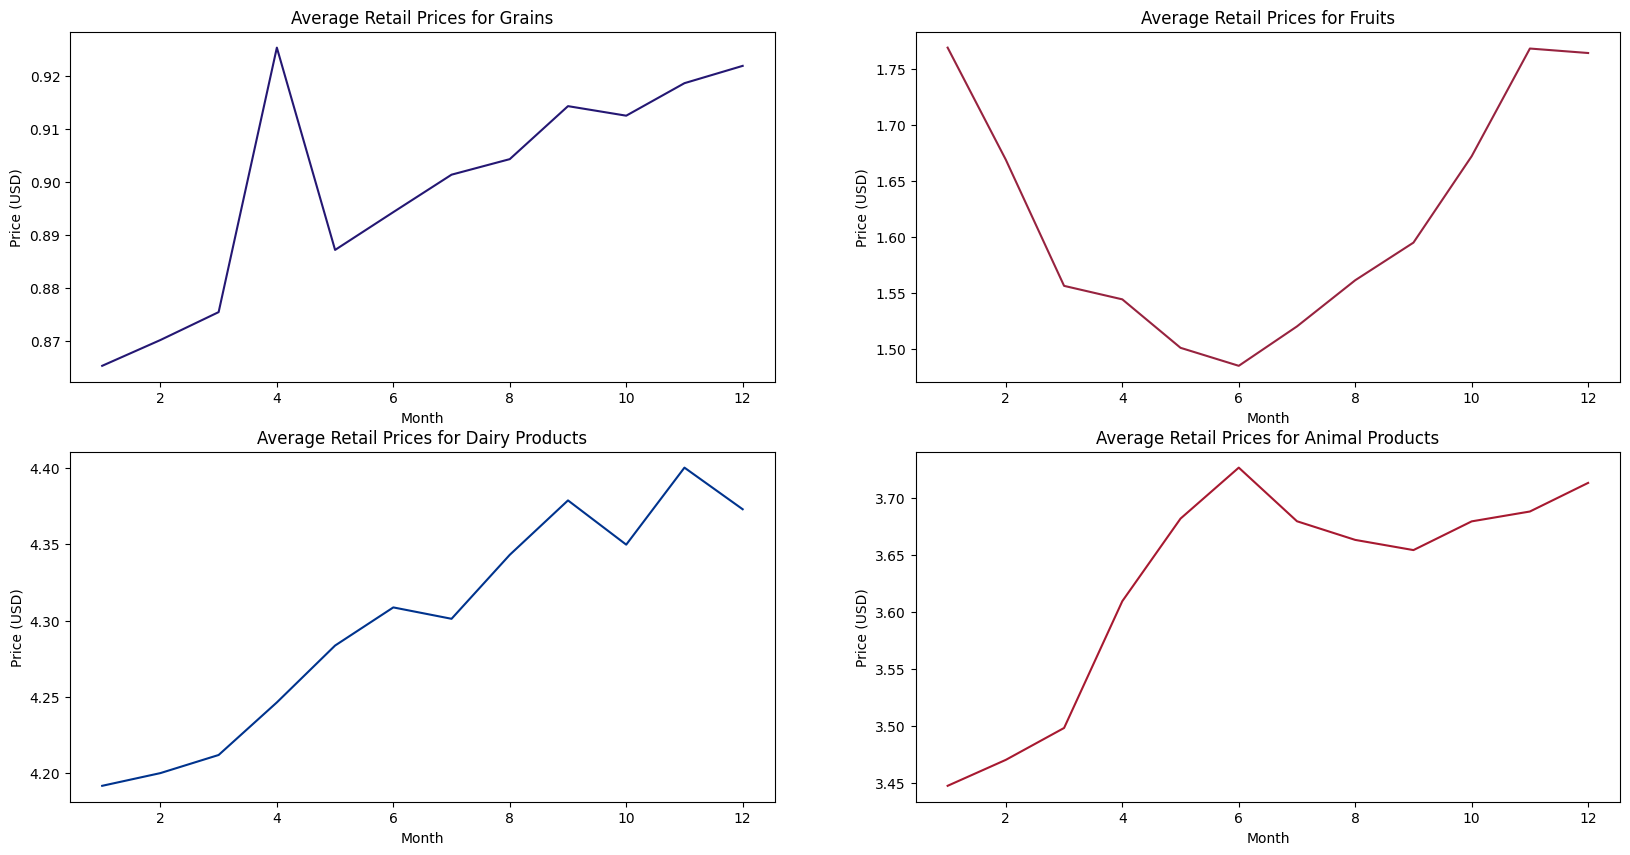

In [6]:
# Define the category colors
category_colors = {
    'Grains': '#241773', 
    'Fruits': '#97233f',
    'Dairy Products': '#00338d', 
    'Animal Products': '#a71930', 
}

# Create the canvases
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Loop over the categories and plot the data on each canvas
for i, category in enumerate(category_colors.keys()):
    row = i // 2
    col = i % 2
    ax = axes[row][col]

    # Filter the data for the current category and recent years
    category_data = data[(data['category'] == category) & (data['year'] >= 2018)]
    # Group the data by month and calculate the mean price for each month
    monthly_means = category_data.groupby('month')['us_city_average_retail_price'].mean()

    # Plot the data as a line chart
    ax.plot(monthly_means.index, monthly_means.values, color=category_colors[category])

    # Set the chart title and axis labels
    ax.set_title(f'Average Retail Prices for {category}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Price (USD)')

# Show the plots
plt.show()


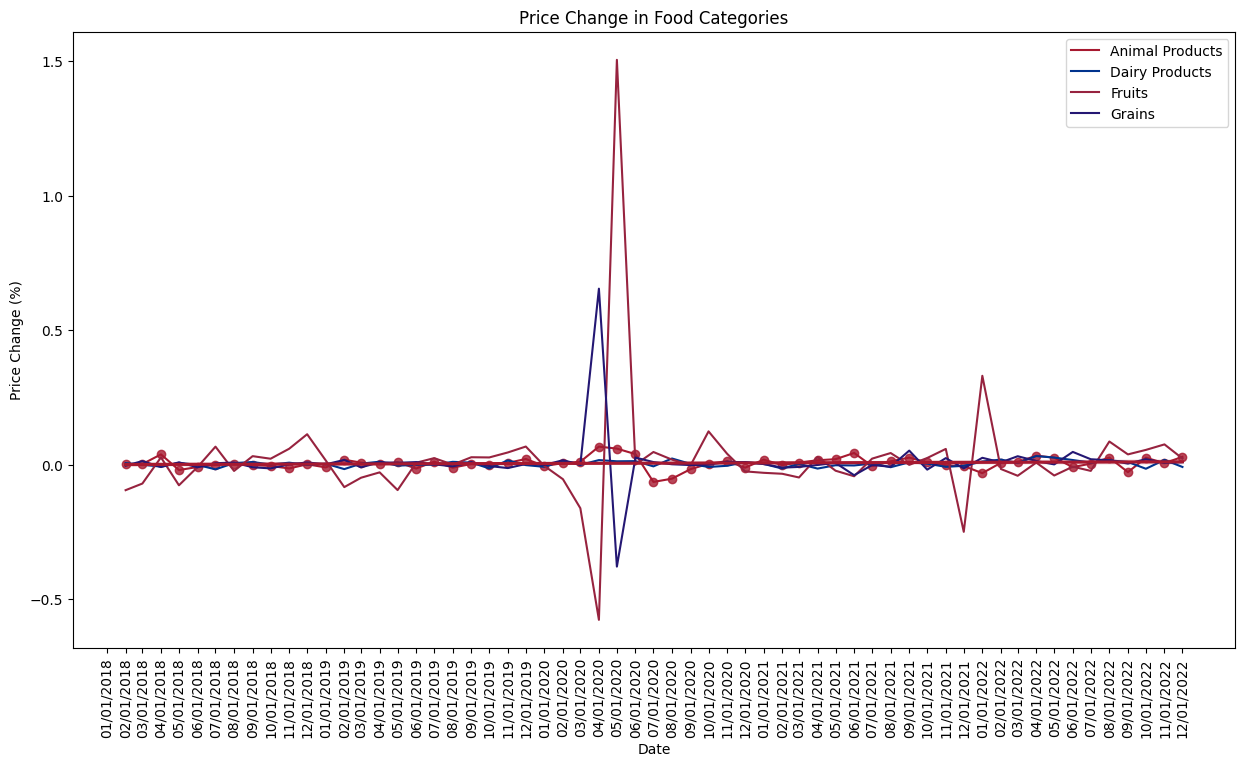

In [7]:
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format='%Y-%m')

recent_data = data[data['date'] >= '2018-01-01']

grouped_data = recent_data.groupby(['category', 'date'])['us_city_average_retail_price'].mean().reset_index()
grouped_data['price_diff'] = grouped_data.groupby('category')['us_city_average_retail_price'].apply(lambda x: x.pct_change())

pivoted_data = grouped_data.pivot(index='date', columns='category', values='price_diff')

# Define the category colors
category_colors = {
    'Animal Products': '#a71930',
    'Dairy Products': '#00338d',
    'Fruits': '#97233f',
    'Grains': '#241773',
}

# Create the canvas
fig, ax = plt.subplots(figsize=(15, 8))

# Loop over the categories and plot the data on the same canvas
for category, color in category_colors.items():
    # Plot the data as a line chart
    ax.plot(pivoted_data.index, pivoted_data[category], color=color, label=category)

# Set the chart title and axis labels
ax.set_title('Price Change in Food Categories')
ax.set_xlabel('Date')
ax.set_ylabel('Price Change (%)')

# Set the x-axis ticks and labels
ax.set_xticks(pivoted_data.index)
ax.set_xticklabels(pivoted_data.index.strftime('%m/%d/%Y'), rotation=90)

# Add a legend to the chart
ax.legend(loc='best')

# Import date converter
from matplotlib.dates import date2num

# Convert DatetimeIndex to float using date converter
x = date2num(pivoted_data.index.to_pydatetime())

# Add a trend line to the chart
sns.regplot(x=x, y=pivoted_data['Animal Products'].values, ax=ax, color=category_colors['Animal Products'])



# Show the plot
plt.show()
